# Блок №5 Минипроект

# Задачи
1. Загрузите [датасет](https://disk.yandex.ru/d/OoOH0Nl8Q2RYGw) `transaction_data.csv`. Проверьте размер таблицы, типы переменных, число пропущенных значений и описательную статистику.
2. Какие значения находятся в колонке `transaction`? Сколько наблюдений относятся к тому или иному уровню? Визуализируйте результат с помощью барплота. Подумайте, как можно улучшить график.
3. Сколько транзакций завершились ошибкой?
4. Сколько успешных транзакций осуществил каждый из пользователей? Постройте гистограмму распределения числа успешных транзакций.
5. Коллега прислал Вам обновленные [данные](https://disk.yandex.ru/d/lyKNd0eq2mb9-A). Постройте сводную таблицу `user_vs_minute_pivot`, где в качестве столбцов будут использованы имена пользователей, строк – минуты, значений – число совершенных операций в указанную минуту. Пропущенные значения заполните нулями.
6. Изучите представленный график. Помогите коллеге разобраться,  есть ли в данных ошибка, или же всё хорошо.
7. Если в данные закралась ошибка, исправьте её и сохраните правильное число минут, прошедших с начала дня, в колонку true_minute.

# Описание данных
Имеются следующие данные:

+ `date` – дата (2020-03-02 00:00:00 – 2020-03-02 01:29:05)
+ `name` – имя пользователя
+ `transaction` – статус транзакции
+ `minute`* – сколько минут прошло с начала дня

*Доступна в данных с 5 шага.

In [2]:
# Импортируем библиотеки 
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

# Задание 1
___
Загрузите датасет `transaction_data.csv`. Проверьте размер таблицы, типы переменных, число пропущенных значений и описательную статистику.

Вопрос: сколько в датасете пропущенных значений?

In [3]:
path = 'https://stepik.org/media/attachments/lesson/361624/transaction_data.csv'

In [5]:
# Считаем данные
transaction = pd.read_csv(path)

In [6]:
transaction

,date,name,transaction
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled
1,2020-03-02 00:59:09,Irina_Fedorova,successfull
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled
...,...,...,...
5310,2020-03-02 00:09:28,Vasilisa_Fedorova,successfull
5311,2020-03-02 00:46:31,Vasilisa_Ozerova,successfull
5312,2020-03-02 00:16:38,Olga_Polyanova,successfull
5313,2020-03-02 00:13:00,Ekaterina_Smirnova,successfull


In [7]:
# Посмотрим, есть ли пропущенные значения в данных
transaction.isna().sum()

date           0
name           0
transaction    0
dtype: int64

In [8]:
# Посмотрим на формат данных
transaction.dtypes

date           object
name           object
transaction    object
dtype: object

In [9]:
# Посмотрим на описатльную статистику
transaction.describe()

,date,name,transaction
count,5315,5315,5315
unique,3373,56,3
top,2020-03-02 00:33:10,Masha_Ozerova,successfull
freq,6,112,3692


# Задание 2
___
Проверьте, какие значения принимает колонка `transaction`? Сколько наблюдений относятся к тому или иному уровню? Визуализируйте результат с помощью барплота.

Расположите уровни переменной в порядке убывания числа относящихся наблюдений (от большего к меньшему) 
Подумайте, хорош ли полученный график? 
Сколько произошло ошибок? 

In [10]:
# Посчитаем сколько и какие значения есть в колокне transaction
transaction_distibution = transaction.transaction.value_counts()

In [11]:
transaction_distibution

successfull    3692
cancelled      1619
error             4
Name: transaction, dtype: int64

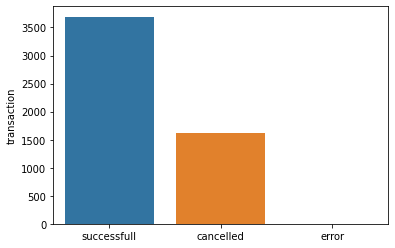

In [12]:
# Визуализируем данные
sns.barplot(x = transaction_distibution.index, y = transaction_distibution)

Ответ:
```
successfull
cancelled
error
```
Ответ:
```
Плохо видно число наблюдений у некоторых значений
```
Ответ:
```
4
```

# Задание 3
___
Сколько транзакций осуществил каждый из пользователей? Осуществлёнными считаются транзакции со значением `successfull`

Посмотрите на характеристики распределения, а затем постройте гистограмму числа успешных транзакций, совершённых каждым пользователем, где

+ по оси x – число транзакций
+ по оси y – доля пользователей с таким числом транзакций

Выберите верные утверждения:
+ Пользователи в среднем совершили примерно по 66 транзакций
+ Максимальное число транзакций – 82
+ Пользователи в среднем совершили по 64 транзакции
+ Примерно 25% пользователей совершили менее 61 транзакции
+ Примерно 25% пользователей совершили более 61 транзакции
+ Пользователи в среднем совершили примерно по 56 транзакций
+ Максимальное число транзакций – 112
+ Пользователи в среднем совершили примерно по 94 транзакции

In [14]:
# Посмотрим сколько транзакций совершил пользователь, предварительно отобрав осуществленные транзакции
transaction_by_user = transaction \
                                .query('transaction == "successfull"') \
                                .groupby('name') \
                                .agg({'transaction': 'count'})

In [15]:
transaction_by_user.head()

,transaction
name,
Ekaterina_Fedorova,72
Ekaterina_Ivanova,59
Ekaterina_Lesnova,63
Ekaterina_Ozerova,72
Ekaterina_Petrova,68


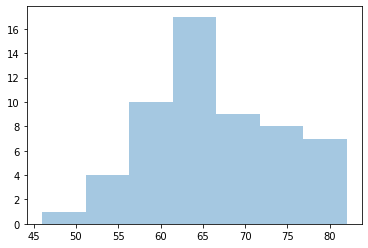

In [17]:
# Визуализируем данные
sns.distplot(transaction_by_user, kde=False);

In [18]:
# Посмотрим описательную статистику
transaction_by_user.describe()

,transaction
count,56.000000
mean,65.928571
std,7.787769
min,46.000000
25%,61.000000
50%,64.000000
75%,72.000000
max,82.000000


Ответ:
+ Пользователи в среднем совершили примерно по 66 транзакций
+ Максимальное число транзакций – 82
+ Примерно 25% пользователей совершили менее 61 транзакции

# Задание 4
___
К вам пришёл коллега с [немного обновленными данными](https://stepik.org/media/attachments/lesson/361624/transaction_data_updated.csv). Постройте сводную таблицу `user_vs_minute_pivot`, где

+ столбцы – имена пользователей
+ строки – минута времени осуществления операции (minute)
+ значения – число совершённых операций

Пропущенные значения заполните нулями.

In [20]:
# Считываем данные
transaction2 = pd.read_csv('https://stepik.org/media/attachments/lesson/361624/transaction_data_updated.csv')

In [21]:
transaction2.head()

,date,name,transaction,minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17


In [22]:
# Группируем данные по имени и минуте, агрегируем по сумме транзакций
transaction_number = transaction2 \
            .groupby(['name', 'minute'], as_index=False) \
            .agg({'transaction': 'count'}) \
            .rename(columns={'transaction': 'transaction_number'})

In [23]:
# Смотрим на получившийся результат
transaction_number

,name,minute,transaction_number
0,Ekaterina_Fedorova,0,3
1,Ekaterina_Fedorova,1,4
2,Ekaterina_Fedorova,2,1
3,Ekaterina_Fedorova,3,3
4,Ekaterina_Fedorova,4,3
...,...,...,...
2573,Vasilisa_Smirnova,52,1
2574,Vasilisa_Smirnova,53,1
2575,Vasilisa_Smirnova,54,2
2576,Vasilisa_Smirnova,56,3


In [24]:
# Делаем сводную таблицу по условию
user_vs_minute_pivot = transaction_number.pivot(index='minute', 
                         columns='name',
                        values='transaction_number')

In [26]:
user_vs_minute_pivot.head()

name,Ekaterina_Fedorova,Ekaterina_Ivanova,Ekaterina_Lesnova,Ekaterina_Ozerova,Ekaterina_Petrova,Ekaterina_Polyanova,Ekaterina_Smirnova,Irina_Fedorova,Irina_Ivanova,Irina_Lesnova,...,Svetlana_Petrova,Svetlana_Polyanova,Svetlana_Smirnova,Vasilisa_Fedorova,Vasilisa_Ivanova,Vasilisa_Lesnova,Vasilisa_Ozerova,Vasilisa_Petrova,Vasilisa_Polyanova,Vasilisa_Smirnova
minute,,,,,,,,,,,,,,,,,,,,,
0,3.0,4.0,2.0,3.0,4.0,4.0,2.0,1.0,2.0,2.0,...,NaN,3.0,1.0,1.0,4.0,1.0,3.0,NaN,NaN,1.0
1,4.0,4.0,NaN,4.0,2.0,5.0,4.0,4.0,4.0,3.0,...,4.0,5.0,3.0,2.0,3.0,3.0,NaN,NaN,3.0,2.0
2,1.0,2.0,4.0,4.0,2.0,1.0,3.0,2.0,3.0,3.0,...,4.0,1.0,3.0,3.0,NaN,1.0,2.0,1.0,3.0,1.0
3,3.0,NaN,2.0,NaN,5.0,2.0,1.0,3.0,2.0,2.0,...,1.0,5.0,5.0,2.0,4.0,NaN,3.0,4.0,1.0,NaN
4,3.0,NaN,NaN,3.0,1.0,1.0,2.0,3.0,2.0,1.0,...,1.0,2.0,2.0,1.0,1.0,2.0,2.0,3.0,NaN,1.0


In [27]:
# Заполняем пустые значения нулями
user_vs_minute_pivot.fillna(0, inplace=True)

In [28]:
user_vs_minute_pivot.head()

name,Ekaterina_Fedorova,Ekaterina_Ivanova,Ekaterina_Lesnova,Ekaterina_Ozerova,Ekaterina_Petrova,Ekaterina_Polyanova,Ekaterina_Smirnova,Irina_Fedorova,Irina_Ivanova,Irina_Lesnova,...,Svetlana_Petrova,Svetlana_Polyanova,Svetlana_Smirnova,Vasilisa_Fedorova,Vasilisa_Ivanova,Vasilisa_Lesnova,Vasilisa_Ozerova,Vasilisa_Petrova,Vasilisa_Polyanova,Vasilisa_Smirnova
minute,,,,,,,,,,,,,,,,,,,,,
0,3.0,4.0,2.0,3.0,4.0,4.0,2.0,1.0,2.0,2.0,...,0.0,3.0,1.0,1.0,4.0,1.0,3.0,0.0,0.0,1.0
1,4.0,4.0,0.0,4.0,2.0,5.0,4.0,4.0,4.0,3.0,...,4.0,5.0,3.0,2.0,3.0,3.0,0.0,0.0,3.0,2.0
2,1.0,2.0,4.0,4.0,2.0,1.0,3.0,2.0,3.0,3.0,...,4.0,1.0,3.0,3.0,0.0,1.0,2.0,1.0,3.0,1.0
3,3.0,0.0,2.0,0.0,5.0,2.0,1.0,3.0,2.0,2.0,...,1.0,5.0,5.0,2.0,4.0,0.0,3.0,4.0,1.0,0.0
4,3.0,0.0,0.0,3.0,1.0,1.0,2.0,3.0,2.0,1.0,...,1.0,2.0,2.0,1.0,1.0,2.0,2.0,3.0,0.0,1.0


In [38]:
# Еще один способ выполнить задание
# user_vs_minute_pivot2 = transaction2.pivot_table(index='minute',
#                                                 columns='name',
#                                                 values='transaction',
#                                                 aggfunc='count')
# user_vs_minute_pivot2.fillna(0, inplace=True)

# user_vs_minute_pivot2.head()

# # Сравнение датафреймов
# user_vs_minute_pivot.equals(user_vs_minute_pivot2)
# # Можем получить False, если разный тип данных в колонках

# Задание 5
___
Коллега построил следующий график по сводной таблице из предыдущего шага, и сомневается, что в данных нет ошибки. 
+ по оси x – минута транзакции (сколько минут прошло с начала дня)
+ по оси y – число транзакций
![](https://ucarecdn.com/76242146-2d40-40d8-9a4d-2069d97da56f/-/crop/746x502/52,40/-/preview/)
Как вы думаете, из-за чего мы видим такую картину? Произошла ошибка, или с данными всё хорошо?

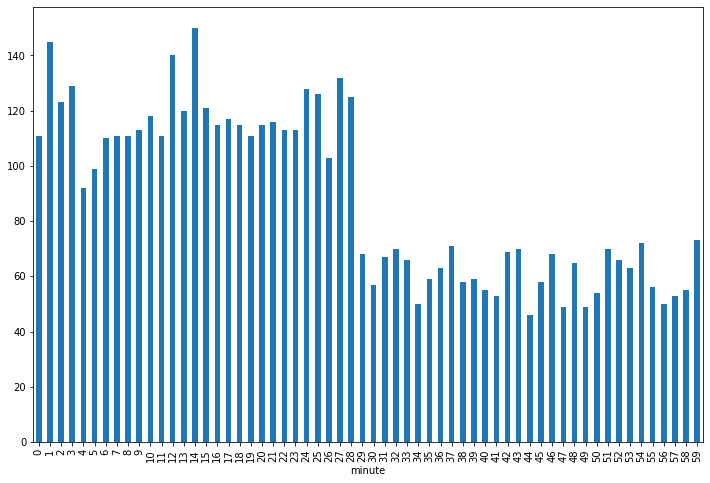

In [39]:
# Строим визуализацию
user_vs_minute_pivot.sum(axis=1).plot.bar(figsize=(12, 8));
# axis=1 обозначет строку, то есть суммируем по строке
# Аномалия в данных в том, что выписана только минутное значение

In [40]:
transaction2.date.max()

'2020-03-02 01:29:05'

In [41]:
transaction2.date.min()

'2020-03-02 00:00:00'

Ответ:
```
Извлекли минутную часть времени, а не число минут с начала дня
```

# Задание 6
___
Исправьте ошибку коллеги (если она есть 😉), и посчитайте число минут, прошедших с начала дня. Результат сохраните в колонку `true_minute`. Постройте график, как в предыдущем стэпе, и посмотрите, произошли ли изменения (график в код включать не нужно).

Например:
```
date                name               transaction  minute  true_minute
2020-03-02 00:37:20 Ekaterina_Petrova  cancelled    37      37
2020-03-02 01:06:14 Ekaterina_Smirnova successfull  6       66
```

In [42]:
transaction2.dtypes

date           object
name           object
transaction    object
minute          int64
dtype: object

In [51]:
# Приведем колонку date временному типу
transaction2['date'] = pd.to_datetime(transaction2.date)

In [52]:
transaction2.dtypes

date           datetime64[ns]
name                   object
transaction            object
minute                  int64
true_minute             int64
dtype: object

In [53]:
transaction2['true_minute'] = transaction2.date.dt.minute + transaction2.date.dt.hour * 60

In [54]:
transaction2['true_minute']

0       37
1       59
2       66
3        2
4       17
        ..
5310     9
5311    46
5312    16
5313    13
5314    75
Name: true_minute, Length: 5315, dtype: int64

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


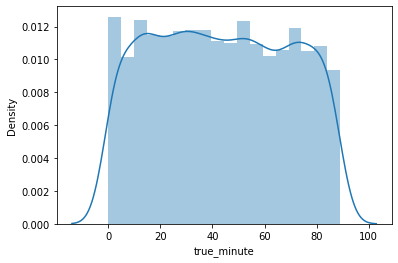

In [55]:
sns.distplot(transaction2['true_minute']);

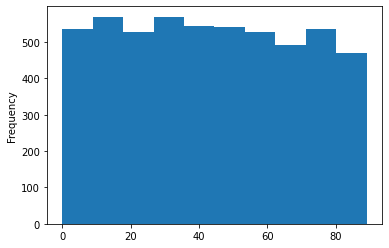

In [49]:
transaction2['true_minute'].plot.hist();

/opt/tljh/user/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


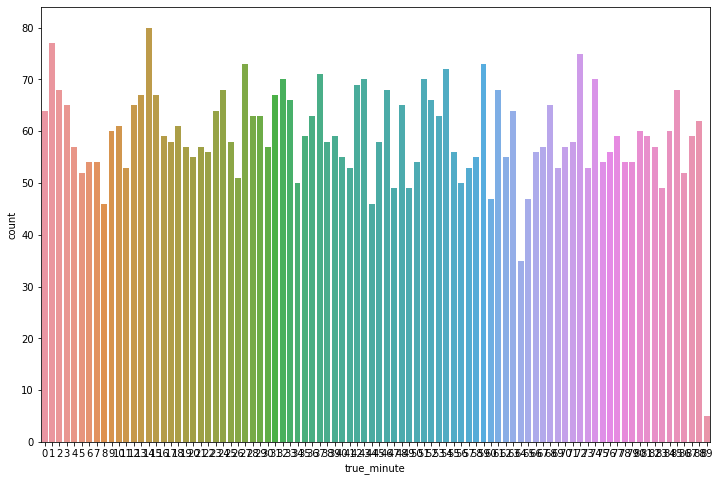

In [50]:
plt.figure(figsize=(12, 8))
sns.countplot(transaction2['true_minute']);